<a href="https://colab.research.google.com/github/MHarizAzmi/LabDemo2/blob/master/Convolutional_Neural_Network_workshop_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.random import seed
seed(888)

#from tensorflow import set_random_seed
#set_random_seed(4112)
import tensorflow
tensorflow.random.set_seed(112)

In [2]:
import os
import numpy as np
import itertools

import tensorflow as tf
import keras
from keras.datasets import cifar10

from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from sklearn.metrics import confusion_matrix

from IPython.display import display
from keras.preprocessing.image import array_to_img

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
LABEL_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
x_train_all.shape

(50000, 32, 32, 3)

In [7]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
x_train_all[0].shape

(32, 32, 3)

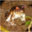

In [9]:
pic = array_to_img(x_train_all[0])
display (pic)

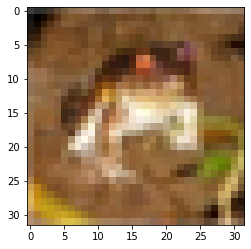

In [10]:
plt.imshow(x_train_all[0])

In [11]:
y_train_all.shape

(50000, 1)

In [12]:
y_train_all[0][0]

6

In [13]:
LABEL_NAMES[y_train_all[0][0]]

'frog'

In [14]:
x_train_all.shape

(50000, 32, 32, 3)

In [15]:
number_of_images, x, y, c = x_train_all.shape
print(f'The number of images = {number_of_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

The number of images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [16]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
x_train_all = x_train_all / 255.0

In [18]:
x_test = x_test / 255.0

In [19]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [20]:
y_cat_train_all = to_categorical(y_train_all, 10)

In [21]:
y_cat_test = to_categorical(y_test, 10)

In [22]:
y_cat_train_all

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
VALIDATION_SIZE = 10000

In [25]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val_cat = y_cat_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 32, 32, 3)

In [26]:
y_val_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
x_train = x_train_all[:VALIDATION_SIZE]
y_cat_train = y_cat_train_all[:VALIDATION_SIZE]

In [28]:
x_train.shape

(10000, 32, 32, 3)

In [29]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
model = Sequential()

## ************* FIRST SET OF LAYERS *************************

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## *************** SECOND SET OF LAYERS ***********************
#Since the shape of the data is 32 x 32 x 3 =3072 ... 
#We need to deal with this more complex structure by adding yet another convolutional layer

# *************CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 32 x 32 x 3 =3072 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience = 2)

In [34]:
history = model.fit(x_train, y_cat_train, epochs = 25, validation_data=(x_val, y_val_cat), callbacks=[early_stop])

Epoch 1/25
313/313 [==============================] - 17s 51ms/step - loss: 1.8234 - accuracy: 0.3273 - val_loss: 1.5457 - val_accuracy: 0.4315
Epoch 2/25
313/313 [==============================] - 16s 50ms/step - loss: 1.4942 - accuracy: 0.4588 - val_loss: 1.3881 - val_accuracy: 0.4928
Epoch 3/25
313/313 [==============================] - 16s 50ms/step - loss: 1.3507 - accuracy: 0.5177 - val_loss: 1.2939 - val_accuracy: 0.5321
Epoch 4/25
313/313 [==============================] - 16s 52ms/step - loss: 1.2257 - accuracy: 0.5656 - val_loss: 1.1369 - val_accuracy: 0.6000
Epoch 5/25
313/313 [==============================] - 17s 55ms/step - loss: 1.1297 - accuracy: 0.6040 - val_loss: 0.9892 - val_accuracy: 0.6538
Epoch 6/25
313/313 [==============================] - 16s 50ms/step - loss: 1.0322 - accuracy: 0.6333 - val_loss: 0.9131 - val_accuracy: 0.6885
Epoch 7/25
313/313 [==============================] - 16s 51ms/step - loss: 0.9422 - accuracy: 0.6675 - val_loss: 0.7965 - val_accuracy:

In [35]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
metrics = pd.DataFrame(model.history.history)

In [37]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.823385,0.3273,1.545665,0.4315
1,1.494211,0.4588,1.388054,0.4928
2,1.350727,0.5177,1.293876,0.5321
3,1.225659,0.5656,1.136921,0.6000
4,1.129716,0.6040,0.989171,0.6538
5,1.032236,0.6333,0.913080,0.6885
6,0.942182,0.6675,0.796536,0.7353
7,0.858438,0.6988,0.764095,0.7343
8,0.758825,0.7365,0.623051,0.7900
9,0.659092,0.7721,0.558284,0.8170


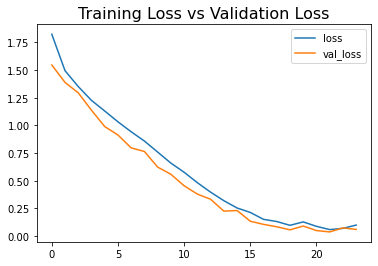

In [40]:
metrics[['loss', 'val_loss']].plot()
plt.title('Training Loss vs Validation Loss', fontsize=16)
plt.show()

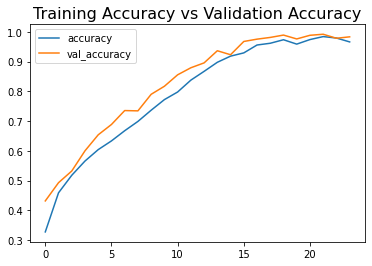

In [41]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy vs Validation Accuracy', fontsize = 16)
plt.show()

In [42]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 4s 14ms/step - loss: 2.9629 - accuracy: 0.5507


[2.9628541469573975, 0.5507000088691711]

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
predictions = np.argmax(model.predict(x_test), axis = -1)

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61      1000
           1       0.62      0.72      0.67      1000
           2       0.47      0.38      0.42      1000
           3       0.36      0.35      0.35      1000
           4       0.49      0.48      0.48      1000
           5       0.42      0.49      0.46      1000
           6       0.66      0.63      0.64      1000
           7       0.63      0.56      0.59      1000
           8       0.62      0.70      0.66      1000
           9       0.60      0.60      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



In [46]:
confusion_matrix(y_test, predictions)

array([[593,  44,  60,  27,  18,  18,  16,   7, 157,  60],
       [ 32, 716,  14,  20,  16,  12,  11,  16,  52, 111],
       [ 84,  19, 379, 118, 102, 117,  75,  46,  39,  21],
       [ 29,  30,  71, 346,  96, 241,  74,  46,  36,  31],
       [ 34,  17, 103,  80, 478,  97,  64,  79,  27,  21],
       [ 22,  21,  56, 163,  70, 494,  45,  82,  28,  19],
       [ 13,  31,  51,  83,  63,  46, 628,  38,  14,  33],
       [ 23,   9,  33,  73, 107, 113,  25, 565,  10,  42],
       [ 97,  62,  20,  25,  10,  10,   9,   7, 703,  57],
       [ 33, 201,  16,  25,  16,  17,   7,  17,  63, 605]])

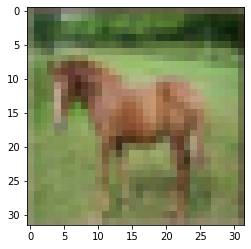

In [51]:
plt.imshow(x_test[48])

In [52]:
my_image = x_test[48]

In [61]:
prediction = model.predict(my_image.reshape(1,32,32,3))
print (prediction.argmax())

7


In [57]:
LABEL_NAMES[y_test[48][0]]

'horse'